## Simulating Random Assignment to Treatment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

In the Johnson and Johnson trials, 43,738 people were enrolled.
These participants were split into two groups at random.
Half received the new vaccine, and the other half received a placebo, such as a saline solution.
Then, everyone was followed for 28 days to see whether they contracted COVID-19.

A lot of information was recorded on each patient, such as their age, race and sex, and in addition
whether they caught COVID, including the severity of the xxx. After following the participants for 28
days, they found 468 cases of COVID-19, of these 117 were in the treatment group and 351 in the control group.


The random assignment to treatment and control, gives the scientists a framework to assess the effectiveness of the vaccine. 
The typical argument goes as follows.
We begin with the assumption that the vaccine is ineffective meaning that  
the 468 who caught COVID-19 and the remaining 43,270 who did not get sick, would have had the same results whether they received the vaccine or not.
That is, the split of 117 sick people in treatment and 351 in control was just do to the chance process in
assigning them to treatment or control.

We can set up an urn model to reflect this position.

### The Urn Model

Our urn has 43,738 marbles, one for each person in the clinical trial.
Since there were 468 cases among all enrolled in the clinical trial,
we label 468 marbles with a 1 and the remaining 43,270 with 0. 
We draw half the marbles, i.e., 21,869, from the urn to receive the treatment, and
the half remaining in the urn receive the placebo, such as a saline solution. 

The results of the experiment are simply the count of the number of marbles marked 1 that were randomly drawn from the urn (the sum of the numbers on the marbles drawn). 

We can simulate this process to get a sense of how likely it would be under these assumptios to draw only 117 marbles marked 1 from the urn. Since we draw half of the marbles from the urn, we would expect about half of the 468, or 234, to be drawn. The simulation study gives us a measure of the variation that might result from the random assignbment process. 


### Simulation study

We saw earlier that we can generate random outcomes according to the hyoergeometric probability distribution, rather than having to program the urn sampling from scratch.   

In [2]:
simulations_fast = np.random.hypergeometric(ngood=468, nbad=43270, nsample=21869, size=500000)

In [3]:
np.mean(simulations_fast)

233.987278

Text(0.5, 0, 'Sample Cases')

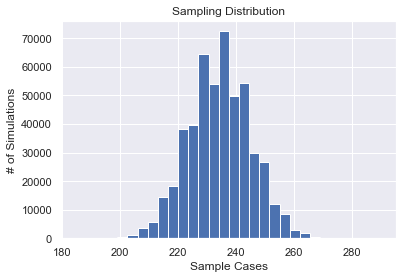

In [4]:

plt.hist(simulations_fast, bins=30)
#plt.axvline(0.57, color='red', linestyle='dashed', linewidth=2)
plt.title('Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Sample Cases')

In our simulation, we repeated the process of random assignment to the treatment group 500,000 times.
Indeed, we found that on average there were 234 cases of disease in the treatment group.

The histogram of outcomes shows that not one of the 500,000 simulations had as 117 cases or fewer.
It would be an extremely rare event to see so few cases of COVID-19, if in fact the vaccine was not effective. 

In [5]:
np.std(simulations_fast)

10.780519474993586

### Vaccine Efficacy



VE is measured by comparing the risk of disease among vaccinated and unvaccinated persons: 
$$ \frac{\textrm{Risk among unvaccinated group} − \textrm{Risk among vaccinated group}}
 {\textrm{Risk among unvaccinated group}},$$ 
where, e.g., the risk among unvaccinated is the nuumber of unvaccinated who contracted COVID divided by the number of unvaccinated. 

Since the two groups had the same number in each, we can compute the efficacy as:

In [6]:
(351 - 117) / 351

0.6666666666666666

The Centers for Disease Control set a standard for Vaccine Efficacy (VE) of 50% when deciding whether to adopt a new vaccine. This would be equivalent to how many cases in the treatment group?

In [7]:
468/3

156.0

The simulation study found no instances of 156 or fewer cases in the treatment group.

In [8]:
sum(np.array(simulations_fast) < 157)

0

CONCLUSION